In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
df= pd.read_csv("train_preprocessed.csv",index_col = 0)
#df_test = pd.read_csv("test_preprocessed.csv",index_col = 0)

In [4]:
df.head()

,Survived,Sex,Embarked,ischild,hasCabin,Hasfam,Pclass_norm
PassengerId,,,,,,,
1,0,0,1,0,0,1,1.0
2,1,1,1,0,1,1,0.0
3,1,1,1,0,0,0,1.0
4,1,1,1,0,1,1,0.0
5,0,0,1,0,0,0,1.0


In [5]:
X = df.drop(["Survived"],axis=1)

In [6]:
y =df["Survived"]

In [7]:
X.head()

,Sex,Embarked,ischild,hasCabin,Hasfam,Pclass_norm
PassengerId,,,,,,
1,0,1,0,0,1,1.0
2,1,1,0,1,1,0.0
3,1,1,0,0,0,1.0
4,1,1,0,1,1,0.0
5,0,1,0,0,0,1.0


In [8]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)

In [10]:
neigh =  KNeighborsClassifier()
lin= LogisticRegression() 
vect= SVC()
tree = DecisionTreeClassifier()
rtree = RandomForestClassifier()

In [11]:
#lname=["neighbors","linear","vector","tree"]
#lname=["neighbors","vector","tree"]
lname=["linear","vector","tree","random tree"]

In [12]:
#lclf= [neigh,lin,vect,tree]
#lclf= [neigh,vect,tree]
lclf= [lin,vect,tree,rtree]

In [13]:
# 4 grilles d'hyperparamètres

In [14]:
param_list = [#{"n_neighbors": [2,3,5,7,9], "weight": ['uniform', 'distance']},
              {"solver" : ['newton-cg', 'lbfgs', 'liblinear']},
              {"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100],'gamma':['scale', 'auto']},
              {'criterion' : ["gini", "entropy"],'splitter' :["best", "random"]},
              {'criterion' : ["gini", "entropy"]}
                ]


In [15]:
gridcvs = {}

In [16]:
for Name,Clf,Param in zip(lname,lclf,param_list):
    gridcvs[Name] = GridSearchCV(Clf,Param)
    #print(Name,Clf,Param)
    

In [17]:
strat = StratifiedKFold(n_splits=5)

In [18]:
outerscore = {}

In [19]:
for name,gcv in gridcvs.items():
    nested_score = cross_val_score(gcv,X_train,y_train,cv=strat)
    outerscore[name] = nested_score
    print(f"{name}: outer accuracy {100 * nested_score.mean():.2f} +/- { 100 * nested_score.std():.2f}")

linear: outer accuracy 78.15 +/- 2.29
vector: outer accuracy 78.90 +/- 1.04
tree: outer accuracy 80.65 +/- 2.24
random tree: outer accuracy 79.78 +/- 1.43


In [20]:

# tree  décision modèle

In [21]:
#Hyperparamètres

In [22]:
param_grid = {'criterion' : ["gini", "entropy"],
              'splitter' :["best", "random"],
              "max_features" : [None,"auto","sqrt","log2"]}

In [23]:
gridcv = GridSearchCV(estimator=tree,param_grid=param_grid)

In [24]:
gridcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [25]:
gridcv.best_params_

{'criterion': 'gini', 'max_features': None, 'splitter': 'best'}

In [26]:
#vérification

In [27]:
tree2 = DecisionTreeClassifier(criterion="gini",max_features=None,splitter="best")

In [28]:
tree2.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred= tree2.predict(X_val)

In [30]:
pd.crosstab(y_val,y_pred)

col_0,0,1
Survived,,
0,53,2
1,14,21


In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        55
           1       0.91      0.60      0.72        35

    accuracy                           0.82        90
   macro avg       0.85      0.78      0.80        90
weighted avg       0.84      0.82      0.81        90



In [33]:
importance = tree2.feature_importances_

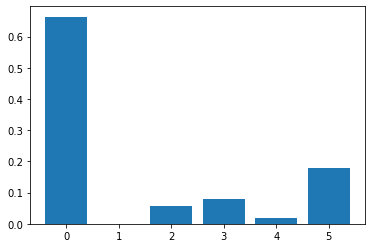

In [34]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [35]:
X.head()

,Sex,Embarked,ischild,hasCabin,Hasfam,Pclass_norm
PassengerId,,,,,,
1,0,1,0,0,1,1.0
2,1,1,0,1,1,0.0
3,1,1,0,0,0,1.0
4,1,1,0,1,1,0.0
5,0,1,0,0,0,1.0


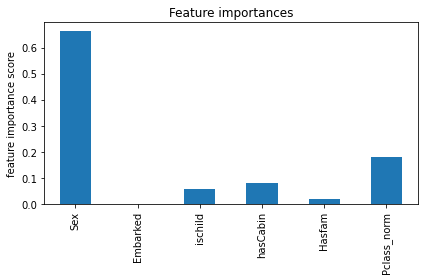

In [36]:
feature_names = list(X.columns.values)
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("feature importance score")
fig.tight_layout()

In [37]:
#random tree model

In [38]:
param_grid_r = {'criterion' : ["gini", "entropy"],
              "max_features" : [None,"sqrt","log2"],
               "class_weight" :["balanced", "balanced_subsample",None]
               }

In [39]:
gridcv_r = GridSearchCV(estimator=rtree,param_grid=param_grid_r)

In [40]:
gridcv_r.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2']})

In [41]:
gridcv_r.best_params_

{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt'}

In [42]:
#Vérification

In [43]:
rtree2 = RandomForestClassifier(criterion="gini",class_weight=None,max_features="sqrt")

In [44]:
rtree2.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt')

In [45]:
y_pred_r= rtree2.predict(X_val)

In [46]:
pd.crosstab(y_val,y_pred_r)

col_0,0,1
Survived,,
0,53,2
1,14,21


In [47]:
print(classification_report(y_val,y_pred_r))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        55
           1       0.91      0.60      0.72        35

    accuracy                           0.82        90
   macro avg       0.85      0.78      0.80        90
weighted avg       0.84      0.82      0.81        90



In [48]:
importance_r = rtree2.feature_importances_

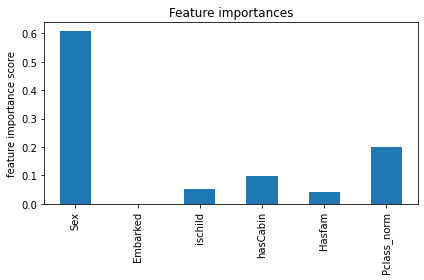

In [49]:
feature_names = list(X.columns.values)
forest_importances_rand = pd.Series(importance_r, index=feature_names)

fig, ax = plt.subplots()
forest_importances_rand.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("feature importance score")
fig.tight_layout()